In [1]:
import ImmoKaa

In [2]:
#initialize ImmoKaa. It takes a name and the criteria yaml file.
ik = ImmoKaa.scraper("my_search", "./criteria.yaml")

Found 14 pre-existing data file(s). You can access the full dataset using get_full_dataset().


In [3]:
ik.set_verbose(True)

In [4]:
dd=ik.scrape()

city: Lausanne
Scanning the following url: https://www.immoscout24.ch/en/real-estate/buy/city-Lausanne?pt=10m&r=5&nrf=4.5&nrt=8&pa=30&pn=1
	page: 1/2 (24 results)
Scanning the following url: https://www.immoscout24.ch/en/real-estate/buy/city-Lausanne?pt=10m&r=5&nrf=4.5&nrt=8&pa=30&pn=2
	page: 2/2 (14 results)
city: Nyon
Scanning the following url: https://www.immoscout24.ch/en/real-estate/buy/city-Nyon?pt=10m&r=5&nrf=4.5&nrt=8&pa=30&pn=1
	page: 1/1 (20 results)
city: Morges
Scanning the following url: https://www.immoscout24.ch/en/real-estate/buy/city-Morges?pt=10m&r=5&nrf=4.5&nrt=8&pa=30&pn=1
	page: 1/1 (7 results)
city: Rolle
Scanning the following url: https://www.immoscout24.ch/en/real-estate/buy/city-Rolle?pt=10m&r=5&nrf=4.5&nrt=8&pa=30&pn=1
	page: 1/1 (10 results)
city: Gland
Scanning the following url: https://www.immoscout24.ch/en/real-estate/buy/city-Gland?pt=10m&r=5&nrf=4.5&nrt=8&pa=30&pn=1
	page: 1/1 (11 results)
city: Allaman
Scanning the following url: https://www.immoscou

In [5]:
df = ik.get_full_dataset()

In [6]:
ik.save_scraped_dataframe()

History file created/overwritten.


In [7]:
#cleanup a bit
df = df[df["surfaceLiving"]<300]

<AxesSubplot:>

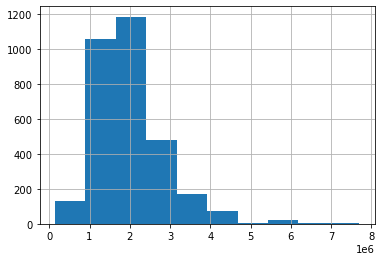

In [8]:
df["sellingPrice"].hist()

In [9]:
#data_all_cities.surfaceLiving[data_all_cities.surfaceLiving==0] = None
df['CHF/m2'] = df.price / df.surfaceLiving

<AxesSubplot:>

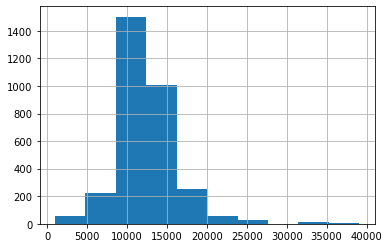

In [10]:
df['CHF/m2'].hist()

In [11]:
df_evolution_mean = df.groupby("fetch-date").agg("mean")
df_evolution_median = df.groupby("fetch-date").agg("median")
df_evolution_mean.columns = [str(col) + '_mean' for col in df_evolution_mean.columns if col != "fetch-date"]
df_evolution_median.columns = [str(col) + '_median' for col in df_evolution_median.columns if col != "fetch-date"]
df_evolution = df_evolution_mean.join(df_evolution_median, on="fetch-date", how="inner")

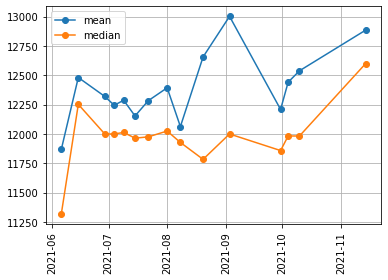

In [12]:
import matplotlib.pyplot as plt
plt.plot(df_evolution['CHF/m2_mean'], marker="o", label="mean")
plt.tick_params(axis="x", labelrotation=90)
plt.plot(df_evolution['CHF/m2_median'], marker="o", label="median")
plt.grid(True)
plt.legend()
plt.tick_params(axis="x", labelrotation=90)
plt.show()

<AxesSubplot:xlabel='fetch-date'>

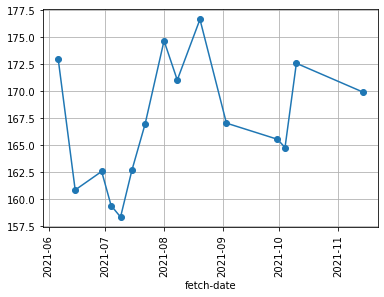

In [13]:
df_evolution['surfaceLiving_mean'].plot(rot=90,  marker="o", grid=True)

<AxesSubplot:xlabel='fetch-date'>

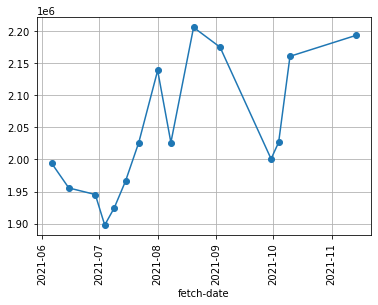

In [14]:
df_evolution['price_mean'].plot(rot=90, marker="o", grid=True)

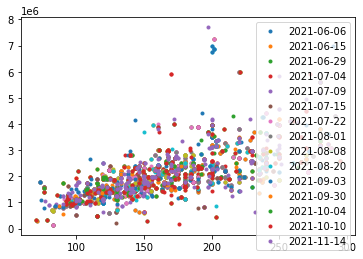

In [15]:
df_dates = df.groupby("fetch-date")
fig, ax = plt.subplots()
for name, df_date in df_dates:
    ax.plot(df_date["surfaceLiving"], df_date["sellingPrice"], marker=".", linestyle="", label=name)
ax.legend()

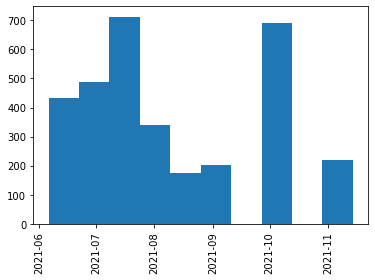

In [16]:
plt.hist(df["fetch-date"])
plt.xticks(rotation=90)
plt.show()

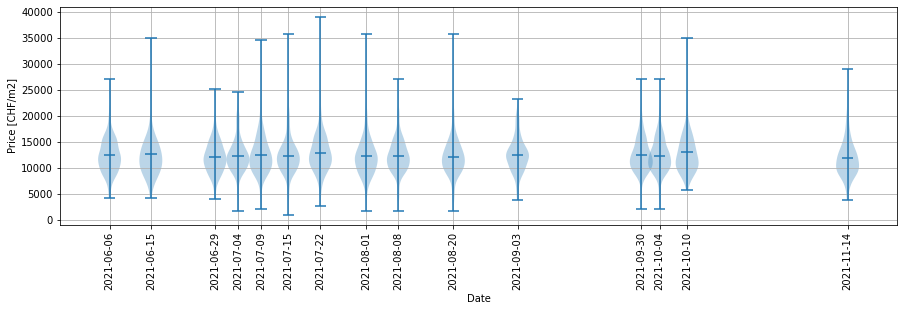

In [17]:
import datetime as dt
import numpy as np
df = df[df['CHF/m2'].notna()]
surface_values = list([np.array(value) for name,value in df.groupby("fetch-date")["CHF/m2"]])
d0 = dt.date(2000, 1, 1)
dist_values = [(d1 - d0).days for d1 in df["fetch-date"].unique()]

fig, ax = plt.subplots(1, 1,figsize=(15,4))

parts = ax.violinplot(surface_values, dist_values, widths=5, showmeans=True, showmedians=False,showextrema=True)
ax.set_xticks(dist_values)
ax.set_xticklabels(df["fetch-date"].unique(), rotation=90)
ax.set_xlabel("Date")
ax.set_ylabel("Price [CHF/m2]")
plt.grid()
plt.show()

In [18]:
import re
s = '''
{"days":e=>{switch(e){case 14:return 3;case 30:return 6;case 60:return 12;case 90:return 18;default:return 6}}}iecuanxe=>{abcvf}culo
'''

In [19]:
# import regex
# #s = re.sub('e=>\{.*?(\{.*?\})*.*?\}', r'""', text)
# #s = re.sub('\{"(render)":.*?(\{.*?\})*.*?\}', r'""', s)
# d = regex.findall(r'(?:\{(?:(?R)|[^{}])*})', s)
# print ('e=>(?:'+dd+')')
# for dd in d: s = s.replace('e=>'+dd, '""')
# #d = regex.sub('e=\>(?:\{(?:(?R)|[^{}])*})', '""', text)
# print (s)
# # print("")
# # print (d[1])